## Aaditya Deshmukh (Clustering Customer data)

- IMS Proschool Pune.
- LinkedIn ID- https://www.linkedin.com/in/aaditya-deshmukh-50174a1a3
- Github URL - https://github.com/Aaditya28-D/Projects-2020

### Loading All required packages

In [69]:
import pandas as pd
import numpy as np
import os as os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings as warnings
warnings.filterwarnings('ignore')

In [70]:
data=pd.read_csv(r'C:\Users\28119\Desktop\IMS\PGD-Data Science\Module 1- Business Analytics\Monisha Mam, LVC\clustering\Customers.csv')

In [71]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [73]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [74]:
data.shape

(200, 5)

In [75]:
data=data.drop(['CustomerID'], axis=1)

In [76]:
data.shape

(200, 4)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [78]:
data.drop(['Gender'], axis=1).columns.tolist()

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

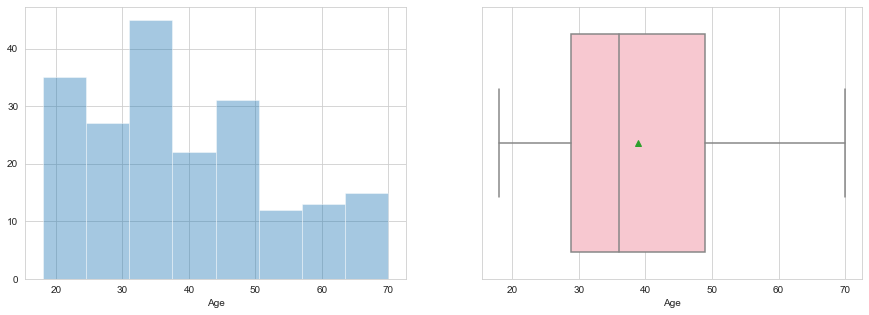

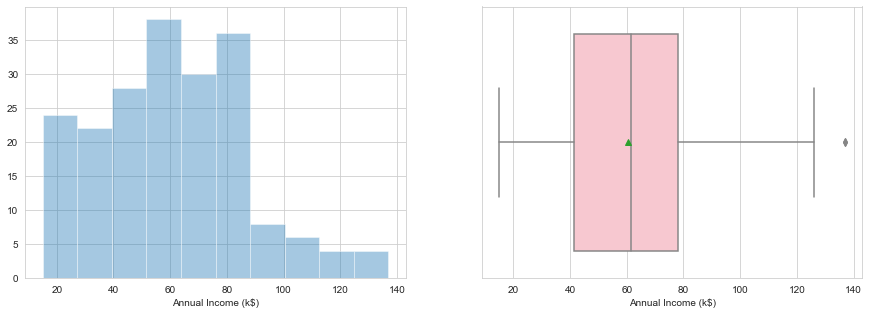

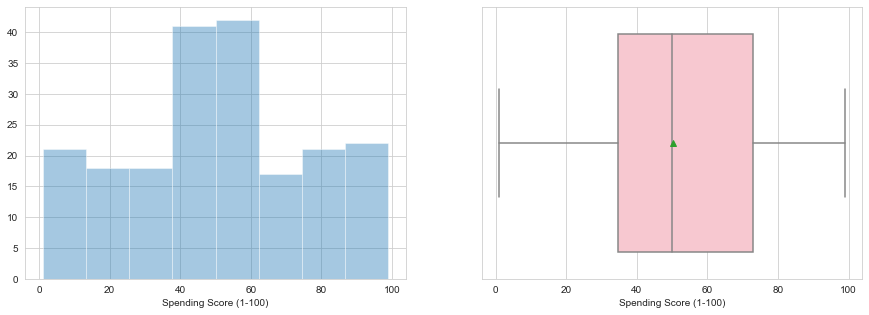

In [79]:
cols=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for x in cols:
    fig, axes=plt.subplots(1, 2, figsize=(15,5))
    sns.distplot(data[x], ax=axes[0], kde=False)
    sns.boxplot(data[x], ax=axes[1], color='pink', showmeans=True)
    plt.show()

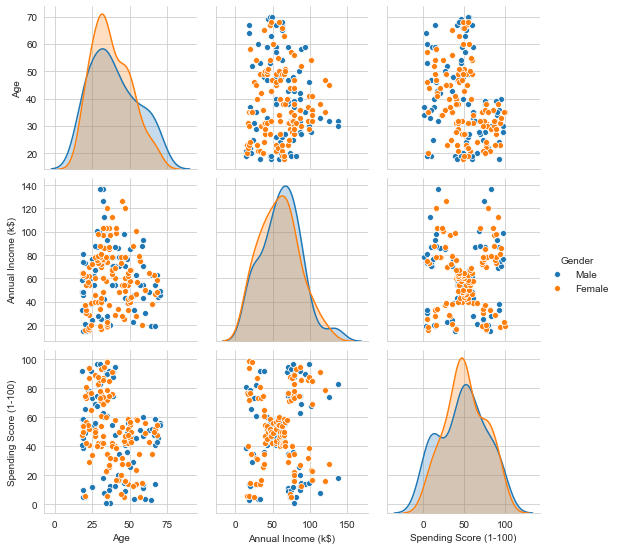

In [80]:
sns.pairplot(data, hue='Gender')

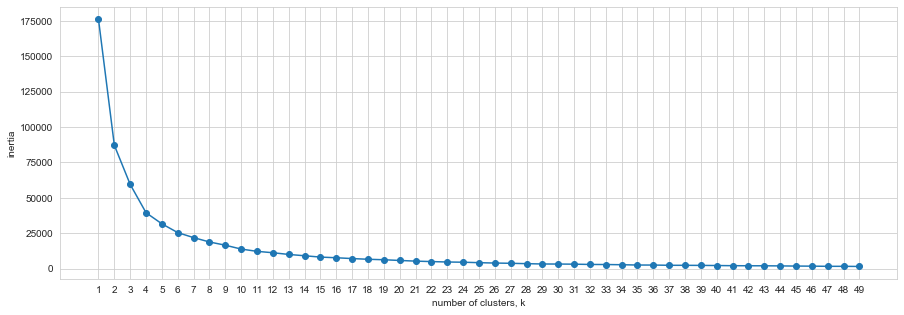

In [94]:
x=data[['Age','Annual Income (k$)']]
ks = range(1,50)
inertias = []
for k in ks:
    Kmean= KMeans(n_clusters=k)
    Kmean.fit(x)
    inertias.append(Kmean.inertia_)  
plt.figure(figsize=(15,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [131]:
x=data[['Age','Annual Income (k$)']]
Kmean=KMeans(n_clusters=4)
Kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [132]:
data['kmean_labels']=Kmean.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_labels,Labels
0,Male,19,15,39,2,3
1,Male,21,15,81,2,3
2,Female,20,16,6,2,3
3,Female,23,16,77,2,3
4,Female,31,17,40,2,3


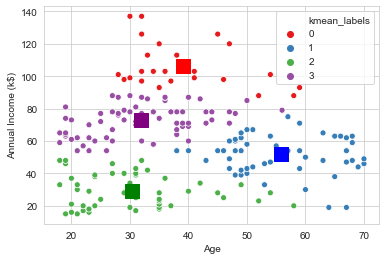

In [134]:
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['kmean_labels'], palette='Set1')
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='red', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='blue', marker='s')
plt.scatter(Kmean.cluster_centers_[2][0], Kmean.cluster_centers_[2][1], s=200, c='green', marker='s')
plt.scatter(Kmean.cluster_centers_[3][0], Kmean.cluster_centers_[3][1], s=200, c='purple', marker='s')
plt.show()

In [135]:
sample_test=np.array([40,120])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0])

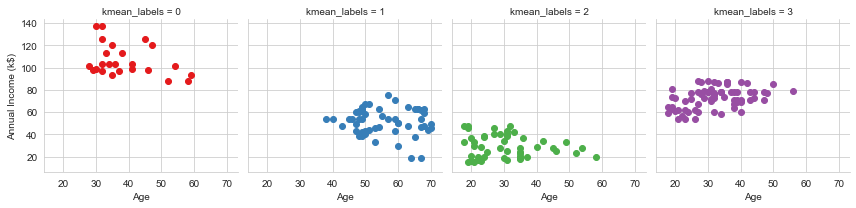

In [140]:
sns.set_style('whitegrid')
g=sns.FacetGrid(data, col='kmean_labels', hue='kmean_labels', palette='Set1')
g=g.map(plt.scatter, 'Age', 'Annual Income (k$)')
#plt.rcParams['axes.kmean_labels']=15

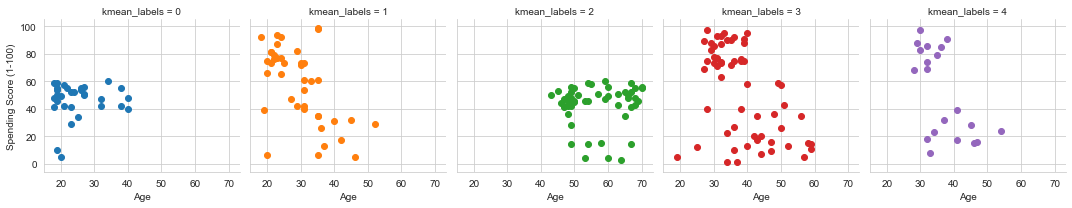

In [101]:
sns.set_style('whitegrid')
g=sns.FacetGrid(data, col='kmean_labels', hue='kmean_labels')
g=g.map(plt.scatter,'Age', 'Spending Score (1-100)')
#plt.rcParams['axes.kmean_labels']=15

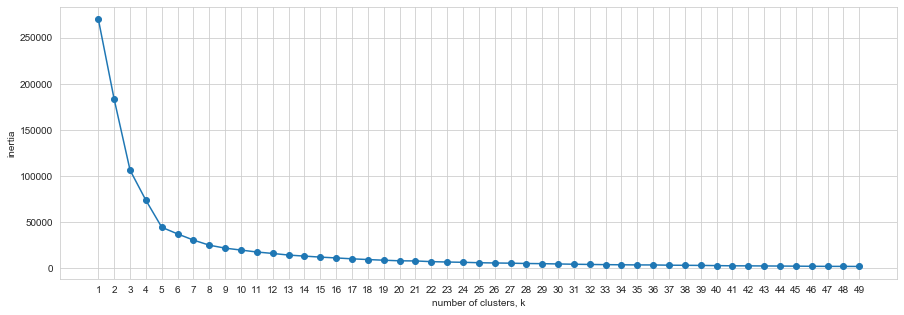

In [141]:
x=data[['Annual Income (k$)', 'Spending Score (1-100)']]
ks = range(1,50)
inertias = []
for k in ks:
    Kmean= KMeans(n_clusters=k)
    Kmean.fit(x)
    inertias.append(Kmean.inertia_)  
plt.figure(figsize=(15,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [142]:
x=data[['Annual Income (k$)', 'Spending Score (1-100)']]
Kmean=KMeans(n_clusters=5)
Kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [143]:
Kmean.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [144]:
data['kmean_labels']=Kmean.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_labels,Labels
0,Male,19,15,39,4,3
1,Male,21,15,81,0,3
2,Female,20,16,6,4,3
3,Female,23,16,77,0,3
4,Female,31,17,40,4,3


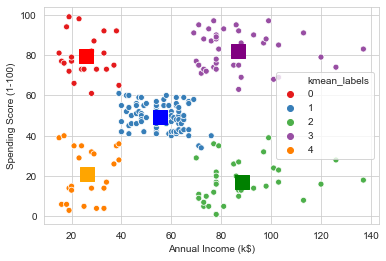

In [145]:
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['kmean_labels'], palette='Set1')
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='red', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='blue', marker='s')
plt.scatter(Kmean.cluster_centers_[2][0], Kmean.cluster_centers_[2][1], s=200, c='green', marker='s')
plt.scatter(Kmean.cluster_centers_[3][0], Kmean.cluster_centers_[3][1], s=200, c='purple', marker='s')
plt.scatter(Kmean.cluster_centers_[4][0], Kmean.cluster_centers_[4][1], s=200, c='orange', marker='s')
plt.show()

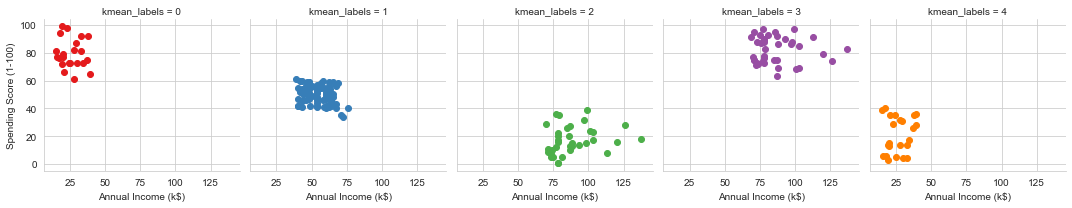

In [146]:
sns.set_style('whitegrid')
g=sns.FacetGrid(data, col='kmean_labels', hue='kmean_labels',palette='Set1')
g=g.map(plt.scatter,  'Annual Income (k$)', 'Spending Score (1-100)',)
#plt.rcParams['axes.kmean_labels']=15

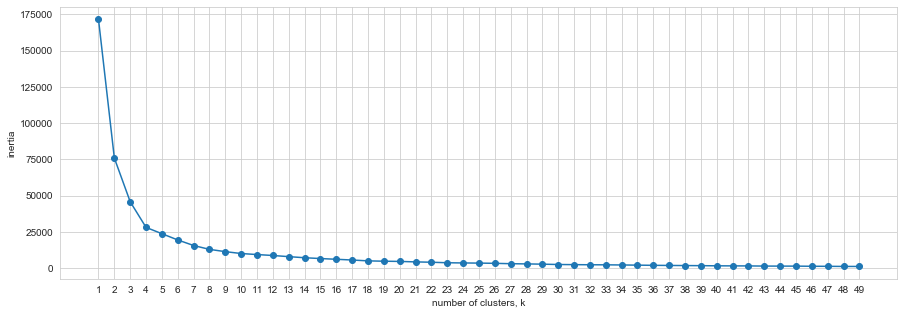

In [148]:
x=data[['Spending Score (1-100)', 'Age']]
ks in range(1,50)
inertias=[]
for k in ks:
    Kmean=KMeans(n_clusters=k)
    Kmean.fit(x)
    inertias.append(Kmean.inertia_)
plt.figure(figsize=(15,5))
plt.plot(ks,inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [149]:
x=data[['Spending Score (1-100)', 'Age']]
Kmean=KMeans(n_clusters=4)
Kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [150]:
Kmean.cluster_centers_

array([[15.02083333, 43.29166667],
       [49.14893617, 27.61702128],
       [82.35087719, 30.1754386 ],
       [48.22916667, 55.70833333]])

In [151]:
data['kmean_labels']=Kmean.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_labels,Labels
0,Male,19,15,39,1,3
1,Male,21,15,81,2,3
2,Female,20,16,6,0,3
3,Female,23,16,77,2,3
4,Female,31,17,40,1,3


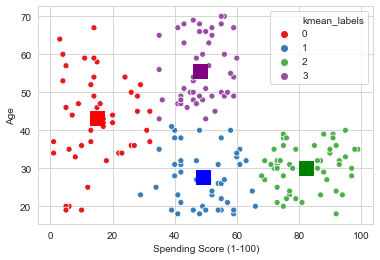

In [152]:
sns.scatterplot(x=data['Spending Score (1-100)'], y=data['Age'], hue=data['kmean_labels'], palette='Set1')
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='red', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='blue', marker='s')
plt.scatter(Kmean.cluster_centers_[2][0], Kmean.cluster_centers_[2][1], s=200, c='green', marker='s')
plt.scatter(Kmean.cluster_centers_[3][0], Kmean.cluster_centers_[3][1], s=200, c='purple', marker='s')
plt.show()

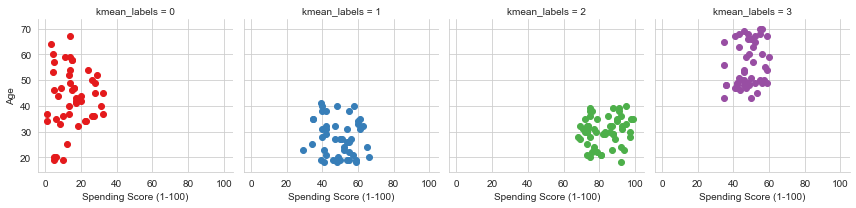

In [153]:
sns.set_style('whitegrid')
g=sns.FacetGrid(data, col='kmean_labels', hue='kmean_labels',palette='Set1')
g=g.map(plt.scatter, 'Spending Score (1-100)', 'Age')
#plt.rcParams['axes.kmean_labels']=15

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
x=data[['Age','Annual Income (k$)']]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [115]:
data['Labels']=cluster.fit_predict(x)

In [116]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_labels,Labels
0,Male,19,15,39,0,3
1,Male,21,15,81,4,3
2,Female,20,16,6,0,3
3,Female,23,16,77,4,3
4,Female,31,17,40,0,3


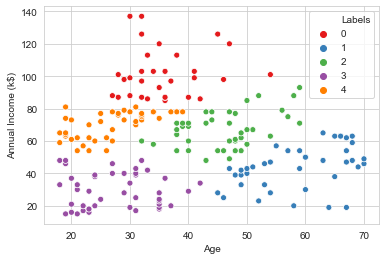

In [117]:
sns.scatterplot(y=data['Annual Income (k$)'], x=data['Age'], hue=data['Labels'], palette='Set1')